In [1]:
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.metrics                   import normalized_mutual_info_score
from scipy.stats                                            import entropy
from math                                                    import log, e
import                                                        pandas as pd
import                                                              timeit
from sklearn.preprocessing                           import StandardScaler
import matplotlib.pyplot                                            as plt
import numpy                                                         as np
import matplotlib                                                   as mpl

def entropy1(labels, base=None):
    value,counts = np.unique(labels, return_counts=True)
    return entropy(counts, base=base)

In [3]:
main_file             =             pd.read_excel('Supporting Dataset.xlsx')
main_file['ΔSOCSign'] = main_file['∆SOC'].apply(lambda x: 1 if x < 0 else 0)
df =                                                      main_file.dropna()
Xo =  df.iloc[:,list(range(20,21)) + list(range(9,10)) + list(range(11,12))]
X  =                                                  Xo.iloc[:, 1:3].values
y  =                                                  Xo.iloc[:, 0:1].values
Xo.iloc[:,:]

,"SOC stock-CT (0-30cm, MgC/ha)",AI (-),NPP (t/ha/yr)
0,37.9,2.191579,3.2
1,38.9,2.191579,3.2
2,39.3,2.191579,3.2
3,39.2,2.191579,3.2
4,37.1,2.191579,3.2
...,...,...,...
145,40.2,1.902353,3.3
146,66.2,1.626462,3.4
147,68.1,1.626462,3.4
148,44.9,2.682189,4.4


In [4]:
for i in range(3):
    print(entropy1(Xo.iloc[:,i].values))

Avg_entropy = [0.5 * (4.795940029983774 + 4.541228896451007), 0.5 * (4.795940029983774 + 3.7527961664015774)]

print("Avg. entropy value for SOC and DI is",  Avg_entropy[0])
print("Avg. entropy value for SOC and NPP is", Avg_entropy[1])

4.795940029983774
4.541228896451007
3.7527961664015774
Avg. entropy value for SOC and DI is 4.668584463217391
Avg. entropy value for SOC and NPP is 4.274368098192675


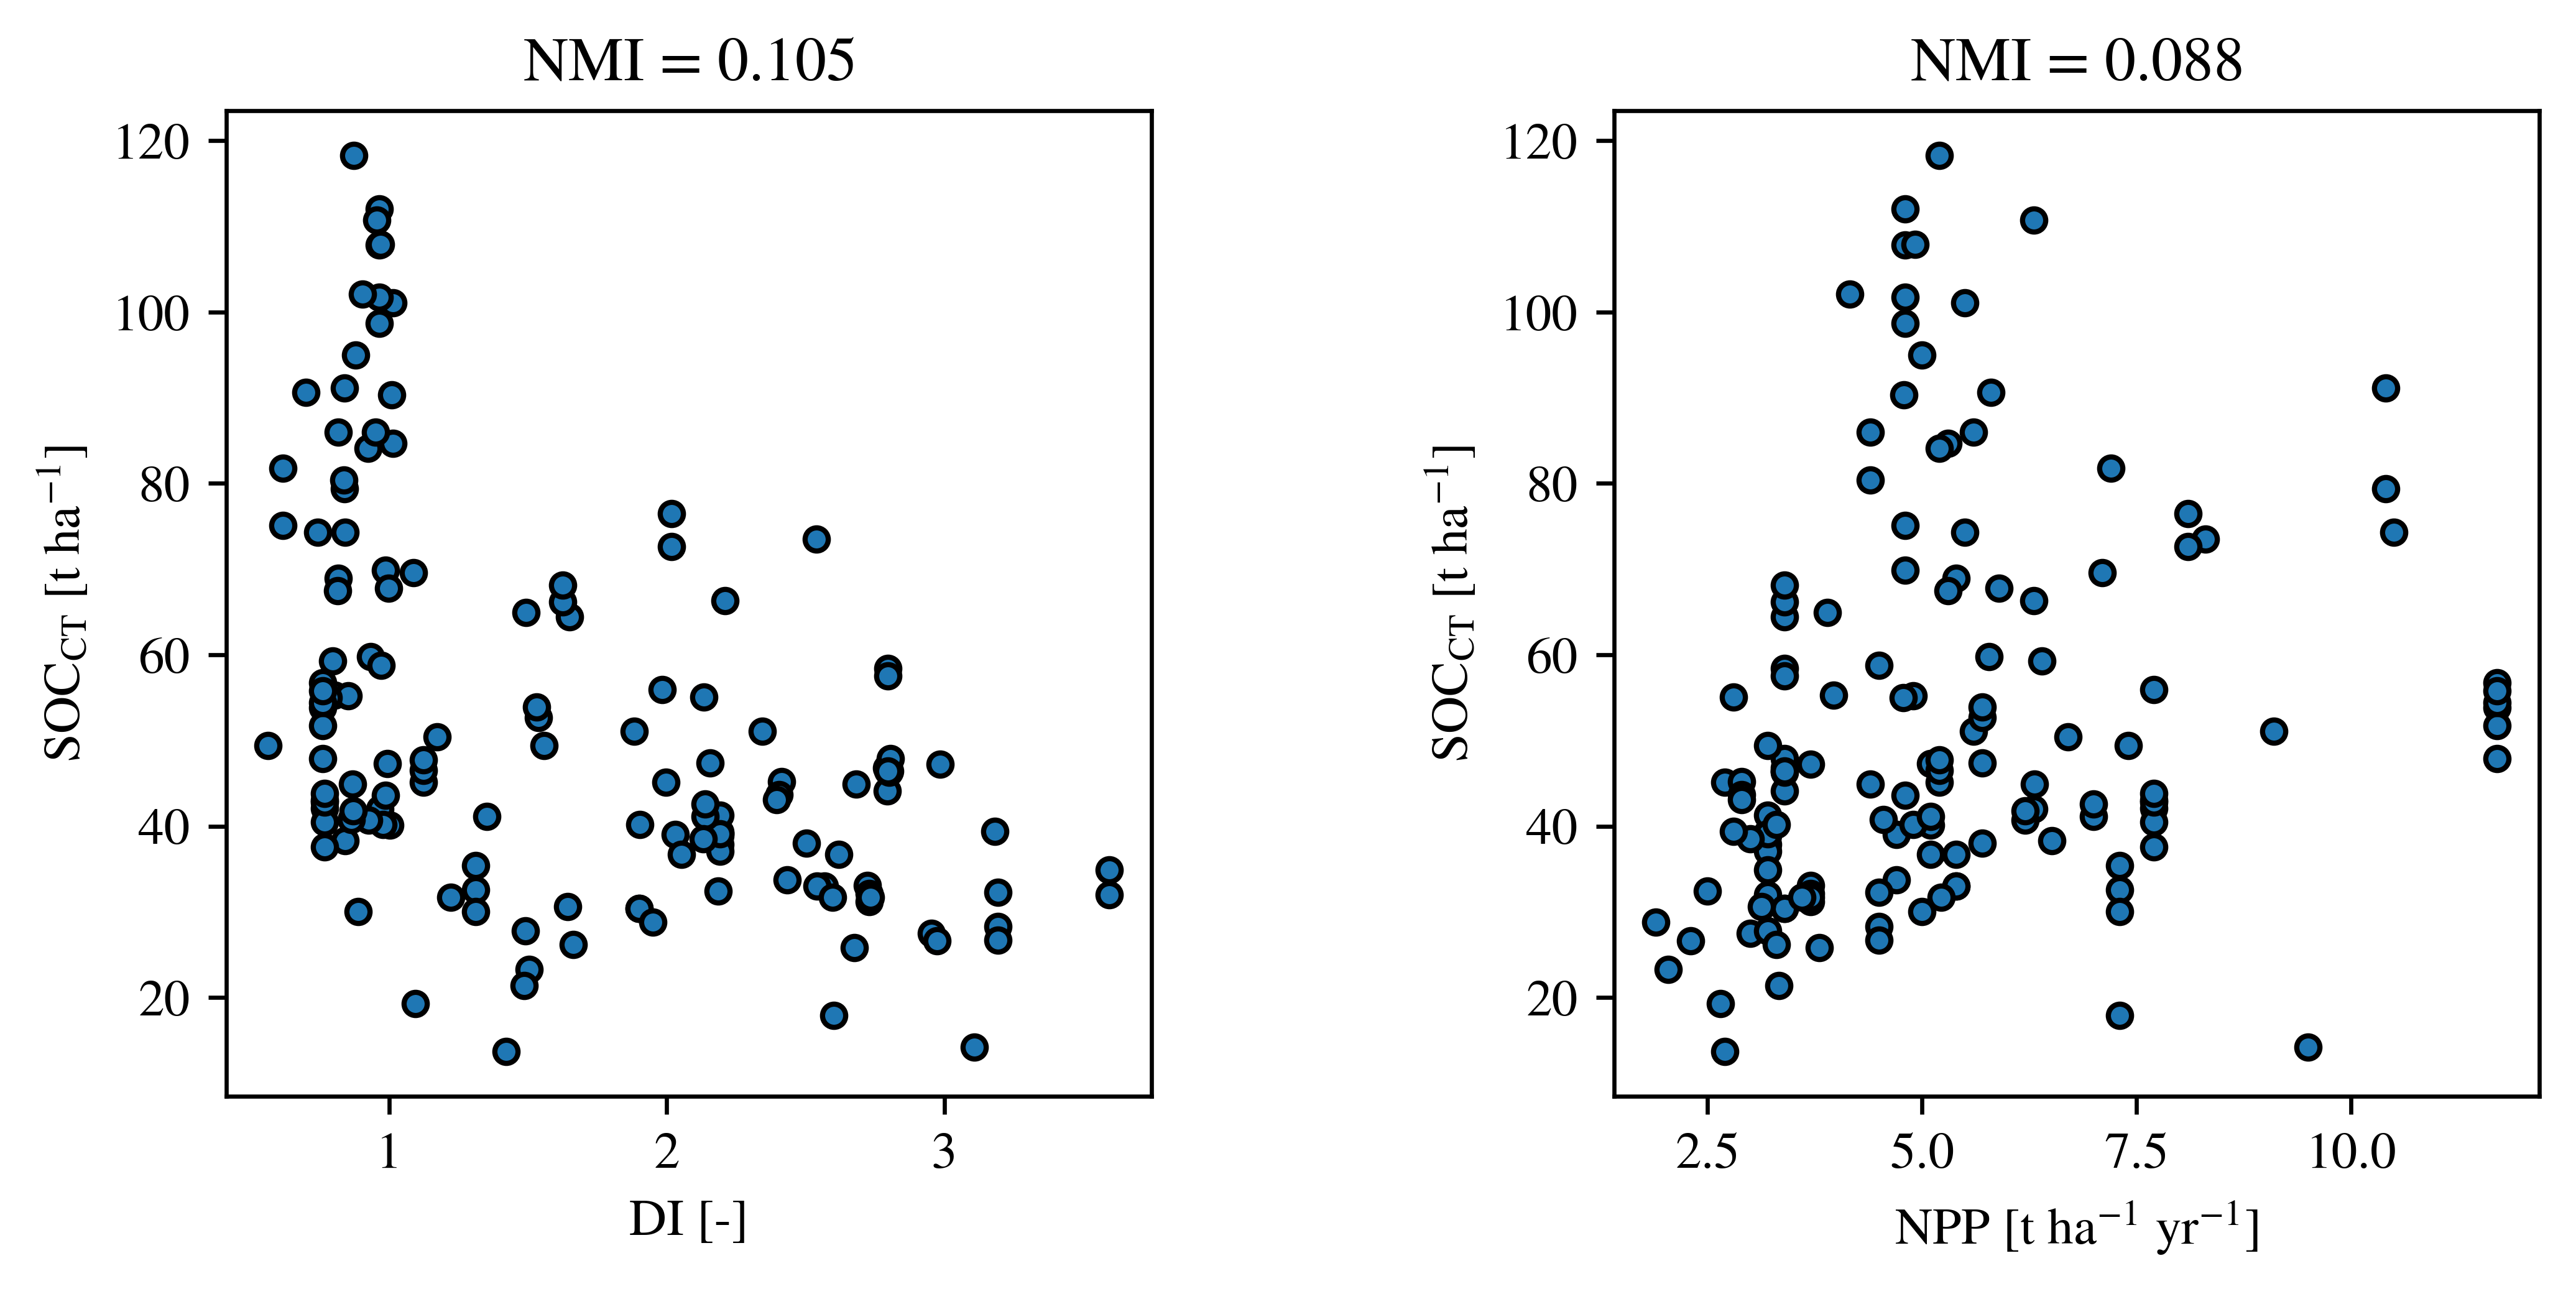

In [5]:
xlab = np.array([r'DI [-]', r'NPP [t ha${}^{-1}$ yr${}^{-1}$]'])

mpl.rcParams['mathtext.fontset']  =  'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'

mi            = mutual_info_regression(X, y)
normalized_mi =               mi/Avg_entropy

fig = plt.figure(figsize=(8, 3.5), dpi = 600)
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], y, edgecolor="black", s=20)
plt.xlabel(xlab[0])
plt.ylabel(r'$\rm SOC_{CT}$ [t ha${}^{-1}$]')
plt.title(r'NMI = ${:.3f}$'.format(normalized_mi[0]))

plt.subplot(1, 2, 2)
plt.scatter(X[:, 1], y, edgecolor="black", s=20)
plt.xlabel(xlab[1])
plt.ylabel(r'$\rm SOC_{CT}$ [t ha${}^{-1}$]')
plt.title(r'NMI = ${:.3f}$'.format(normalized_mi[1]))

plt.subplots_adjust(wspace=0.5)
plt.show()